In [24]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [25]:
data = load_iris()
X = data.data
y = data.target
y_reshaped = y.reshape(-1, 1)

In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
encoder = OneHotEncoder()
y = encoder.fit_transform(y_reshaped).toarray()

input_size, hidden_size, output_size = 4, 10, 3

epoch, learning_rate = 100, 0.01

In [28]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return x > 0

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

Epoch 0, loss: -83.1777
Epoch 50, loss: -83.1777
Epoch 100, loss: -83.1777
Epoch 150, loss: -83.1777
Epoch 200, loss: -83.1777
Epoch 250, loss: -83.1777
Epoch 300, loss: -83.1777
Epoch 350, loss: -83.1777
Epoch 400, loss: -83.1777
Epoch 450, loss: -83.1777
Accuracy: 83.33%


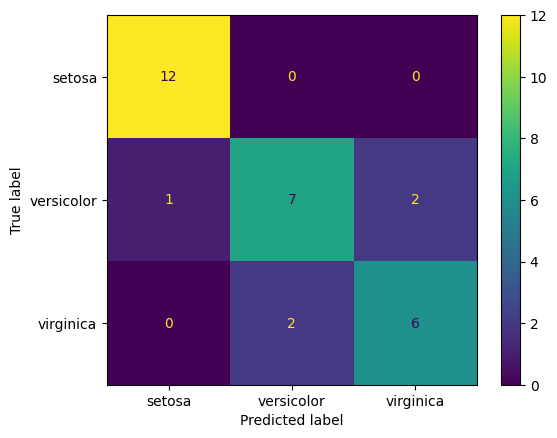

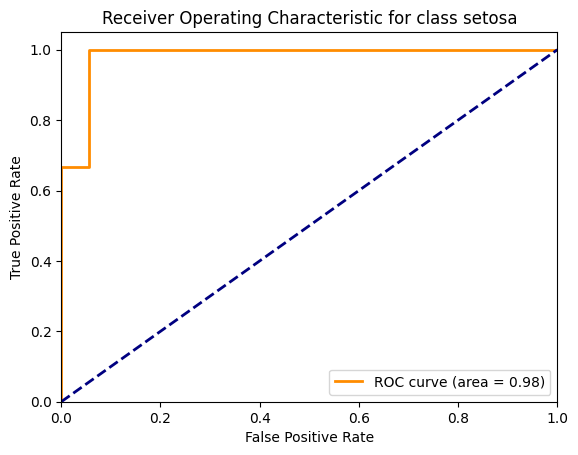

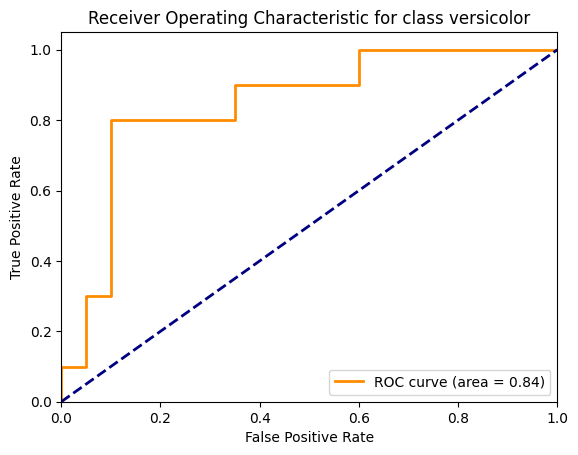

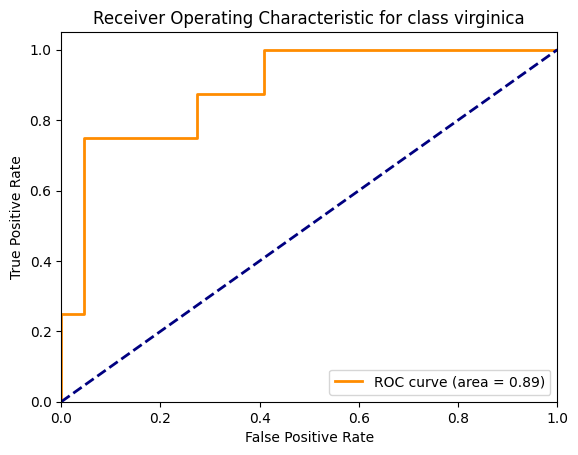

Epoch 0, loss: -83.1777
Epoch 50, loss: -83.1777
Epoch 100, loss: -83.1777
Epoch 150, loss: -83.1777
Epoch 200, loss: -83.1777
Epoch 250, loss: -83.1777
Epoch 300, loss: -83.1777
Epoch 350, loss: -83.1777
Epoch 400, loss: -83.1777
Epoch 450, loss: -83.1777
Accuracy: 70.00%


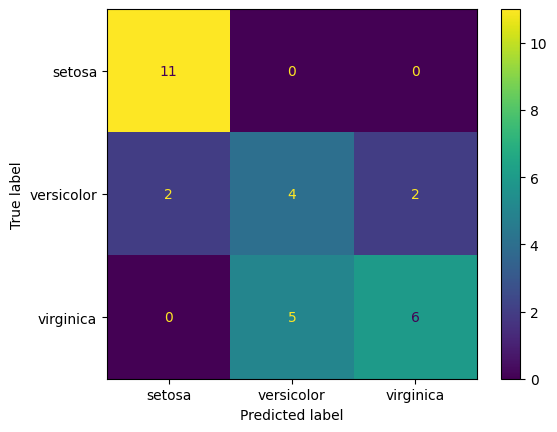

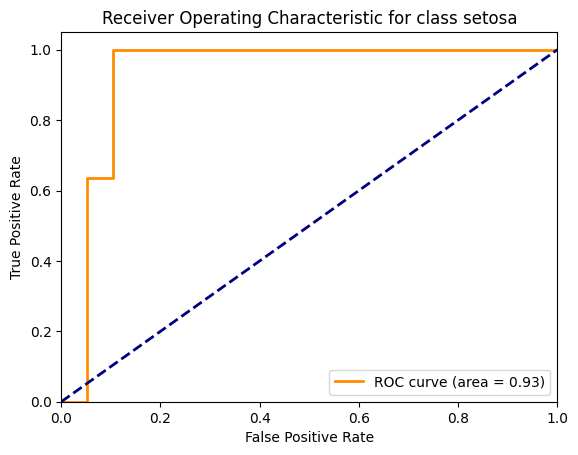

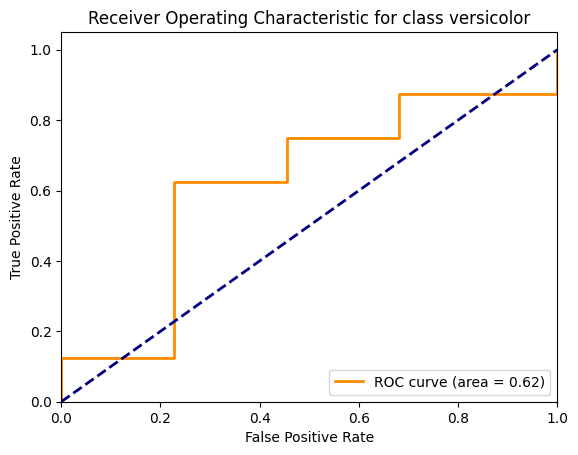

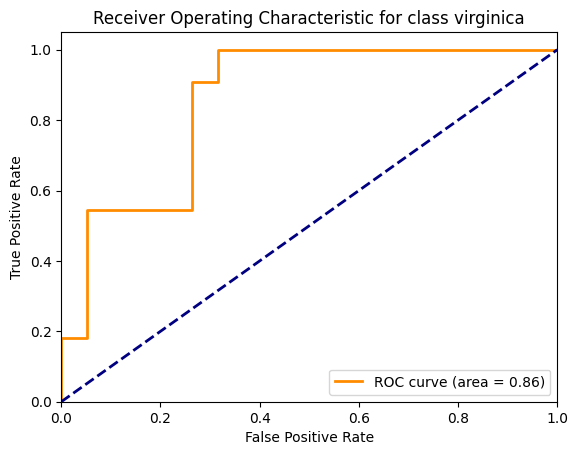

Epoch 0, loss: -83.1777
Epoch 50, loss: -83.1777
Epoch 100, loss: -83.1777
Epoch 150, loss: -83.1777
Epoch 200, loss: -83.1777
Epoch 250, loss: -83.1777
Epoch 300, loss: -83.1777
Epoch 350, loss: -83.1777
Epoch 400, loss: -83.1777
Epoch 450, loss: -83.1777
Accuracy: 70.00%


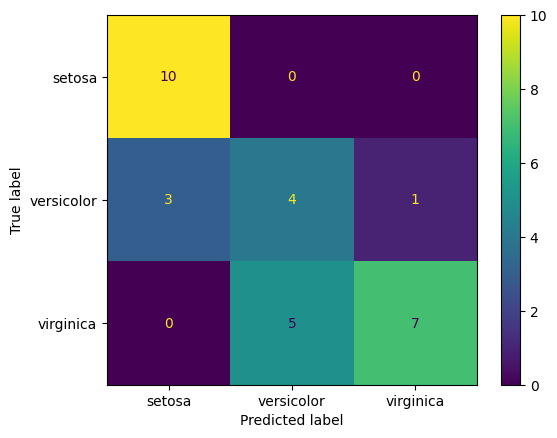

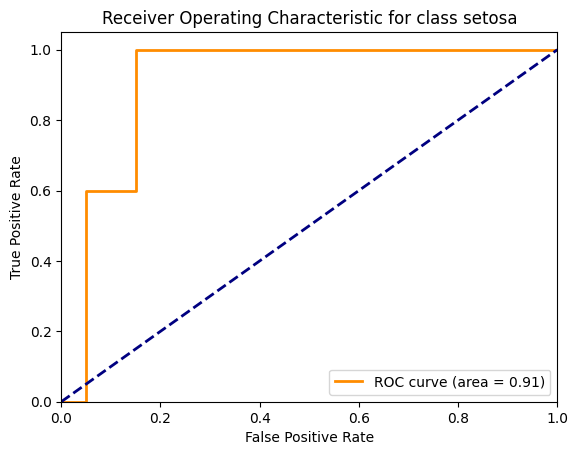

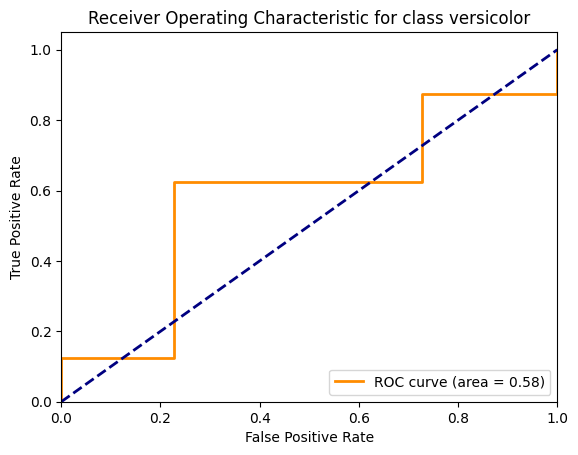

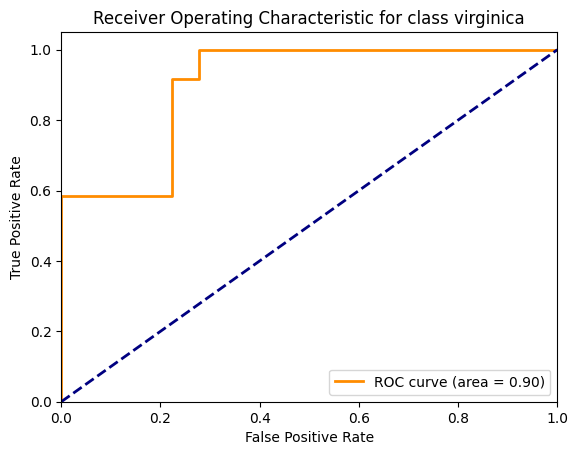

Epoch 0, loss: -83.1777
Epoch 50, loss: -83.1777
Epoch 100, loss: -83.1777
Epoch 150, loss: -83.1777
Epoch 200, loss: -83.1777
Epoch 250, loss: -83.1777
Epoch 300, loss: -83.1777
Epoch 350, loss: -83.1777
Epoch 400, loss: -83.1777
Epoch 450, loss: -83.1777
Accuracy: 76.67%


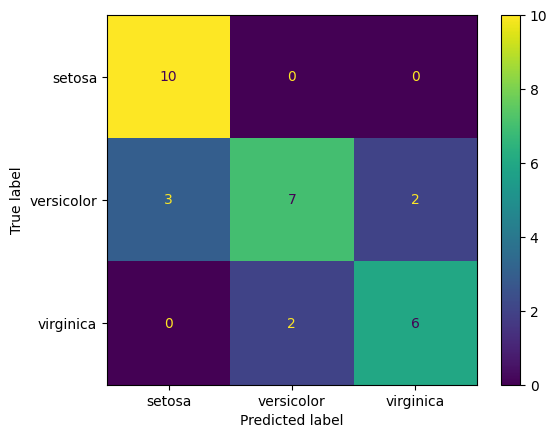

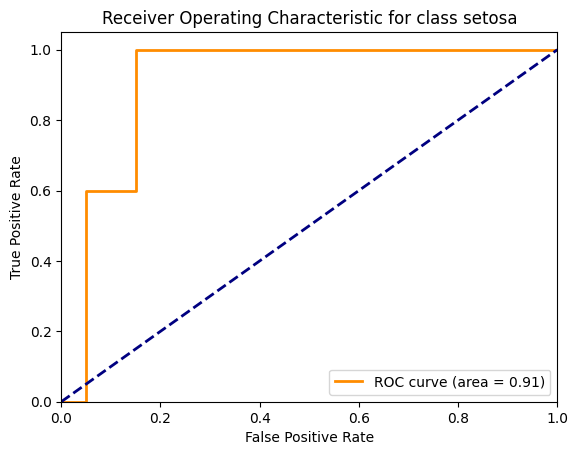

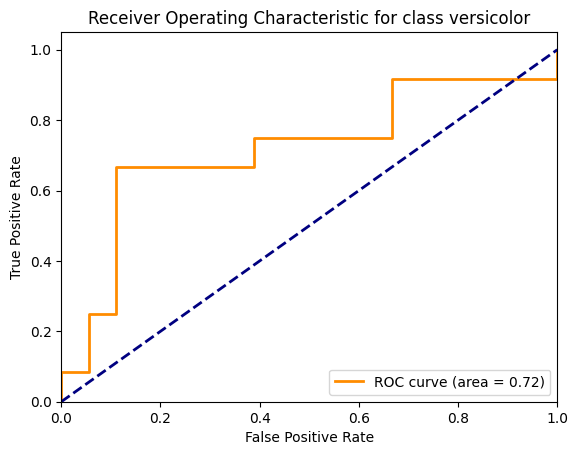

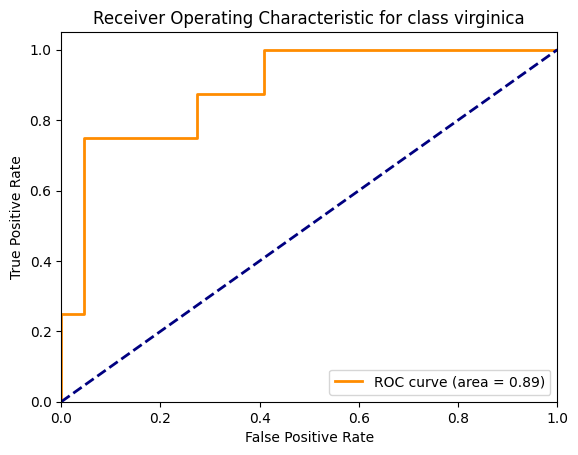

Epoch 0, loss: -83.1777
Epoch 50, loss: -83.1777
Epoch 100, loss: -83.1777
Epoch 150, loss: -83.1777
Epoch 200, loss: -83.1777
Epoch 250, loss: -83.1777
Epoch 300, loss: -83.1777
Epoch 350, loss: -83.1777
Epoch 400, loss: -83.1777
Epoch 450, loss: -83.1777
Accuracy: 56.67%


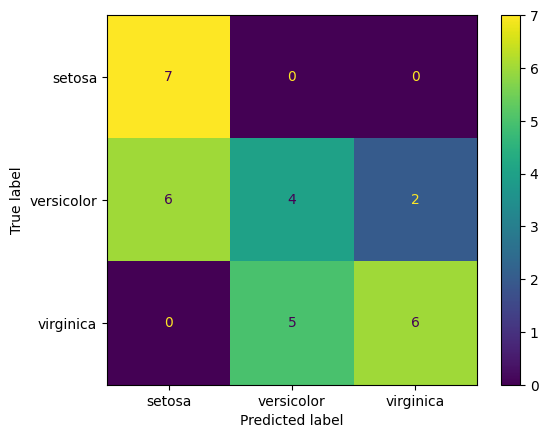

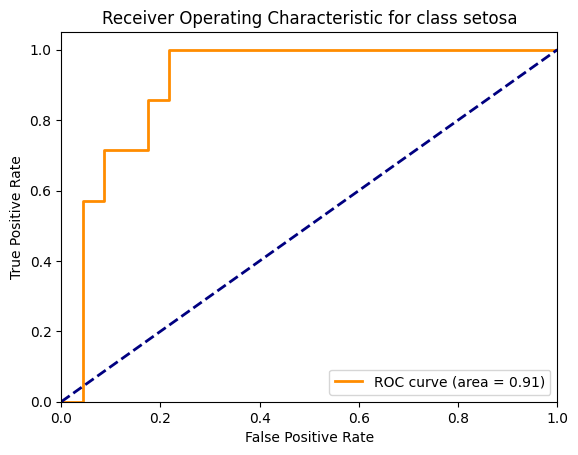

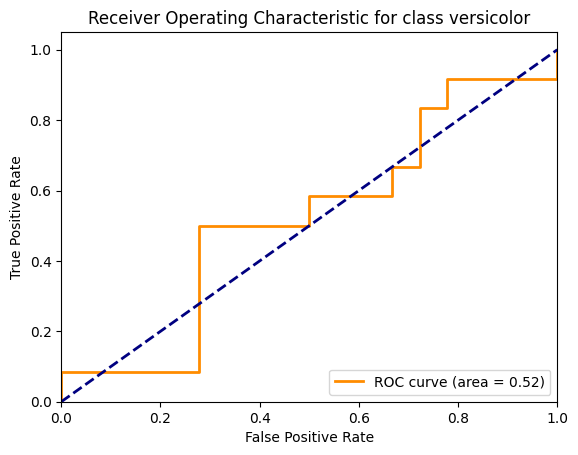

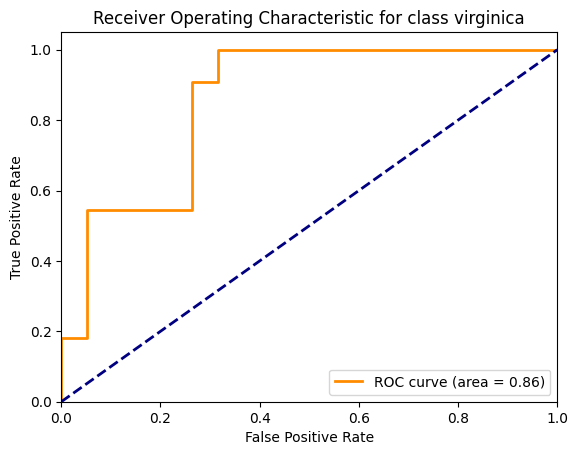

In [37]:
kf = KFold(n_splits=5, shuffle=True)
epochs = 500

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))

    for epoch in range(epochs):
        # Forward propagation
        Z1 = np.dot(X_train, W1) + b1
        O1 = relu(Z1)
        Z2 = np.dot(O1, W2) + b2
        O2 = softmax(Z2)

        # Compute loss
        loss = -np.mean(np.sum(y_train * np.log(2 + 1e-10)))

        # Backpropagation
        dZ2 = O2 - y_train
        dW2 = np.dot(O1.T, dZ2) / X_train.shape[0]
        db2 = np.sum(dZ2, axis=0, keepdims=True) / X_train.shape[0]

        d1 = np.dot(dZ2, W2.T)

        dZ1 = d1 - relu_derivative(O1)
        dW1 = np.dot(X_train.T, dZ1) / X_train.shape[0]
        db1 = np.sum(dZ1, axis=0, keepdims=True) / X_train.shape[0]

        # Update weights and biases
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        if epoch % 50 == 0:
            print(f"Epoch {epoch}, loss: {loss:.4f}")

    # Test the model
    Z1 = np.dot(X_test, W1) + b1
    O1 = relu(Z1_test)
    Z2 = np.dot(A1_test, W2) + b2
    O2 = softmax(Z2_test)

    # Compute accuracy
    y_pred = np.argmax(O2, axis=1)
    y_true = np.argmax(y_test, axis=1)
    accuracy = np.mean(y_pred == y_true)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
    disp.plot()
    plt.show()

    # Compute ROC curve and AUC for each class
    for i in range(output_size):
        fpr, tpr, _ = roc_curve(y_test[:, i], A2_test[:, i])
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic for class {data.target_names[i]}')
        plt.legend(loc='lower right')
        plt.show()